In [803]:
import numpy as np
import matplotlib.pyplot as plt

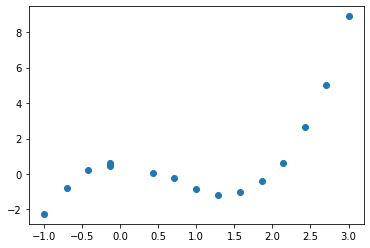

In [804]:
# Пункт 1

x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]
plt.scatter(x,y)

In [805]:
len(x) # len(x) = len(y) = 15

15

In [806]:
# Пункт 1.1) Построим дизайн матрицу:

n = len(x)
m = 5 # положим такое значение m
A = np.zeros((n,m))
for i in range(n):
    for k in range(m):
        A[i,k] = (x[i])**k

In [807]:
A

array([[ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -7.00000000e-01,  4.90000000e-01,
        -3.43000000e-01,  2.40100000e-01],
       [ 1.00000000e+00, -4.30000000e-01,  1.84900000e-01,
        -7.95070000e-02,  3.41880100e-02],
       [ 1.00000000e+00, -1.40000000e-01,  1.96000000e-02,
        -2.74400000e-03,  3.84160000e-04],
       [ 1.00000000e+00, -1.40000000e-01,  1.96000000e-02,
        -2.74400000e-03,  3.84160000e-04],
       [ 1.00000000e+00,  4.30000000e-01,  1.84900000e-01,
         7.95070000e-02,  3.41880100e-02],
       [ 1.00000000e+00,  7.10000000e-01,  5.04100000e-01,
         3.57911000e-01,  2.54116810e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.29000000e+00,  1.66410000e+00,
         2.14668900e+00,  2.76922881e+00],
       [ 1.00000000e+00,  1.57000000e+00,  2.46490000e+00,
         3.86989300e+00

In [808]:
# Пункт 1.2) и 1.3) (постороим нормальную систему уравнений и решим ее)

b = A.T @ y
a = np.linalg.solve (A.T @ A, b)
print(len(a),a)

5 [ 0.51184244 -0.33857023 -2.05689291  1.08931365 -0.01872316]


In [809]:
# Проверим ответ с помощью псевдообратной матрицы
A_pinv = np.linalg.pinv(A)                                    
a = A_pinv @ y
a

array([ 0.51184244, -0.33857023, -2.05689291,  1.08931365, -0.01872316])

In [810]:
A@a - y # Проверка минимизации нормы

array([-0.06451705,  0.13283406, -0.02014003,  0.0759309 , -0.1240691 ,
        0.04190569, -0.16030267,  0.02696979,  0.13878027,  0.04202222,
       -0.07844275,  0.04052803, -0.14900603,  0.11851825, -0.02101161])

In [827]:
# Пункт 3 (решение задачи с помощью QR разложения)
q, r = np.linalg.qr(A)
a = np.linalg.inv(r) @ q.T @ y
a

array([ 0.51184244, -0.33857023, -2.05689291,  1.08931365, -0.01872316])

(-5.0, 10.0)

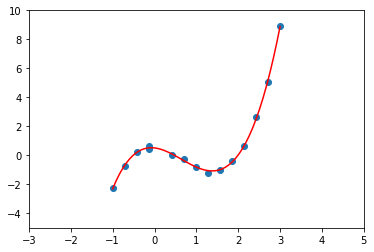

In [811]:
xp = np.linspace(-1,3)
P_m = 0
for i in range(m):
    P_m = P_m + a[i]*(xp**i)
plt.scatter(x,y)
plt.plot(xp,P_m, color = 'red')
plt.xlim(-3,5)
plt.ylim(-5,10)

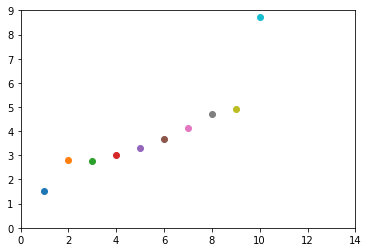

In [828]:
#Пункт 2 (найдем оптимальное значение m)

P_m = 0
S_0 = 0
for m in range(1,15):
    A = np.zeros((n,m))
    for i in range(n):
        for k in range(m):
            A[i,k] = (x[i])**k
    b = A.T @ y
    a = np.linalg.solve (A.T @ A, b)
    P_m = P_m + a[m-1]*((x[m-1])**(m-1))
    #print(P_m,a[0])
    for c in range(n):
        g_c = (1/(n-m))*(S_0 + (P_m - y[c-1])**2)
        S_0 = (P_m - y[c-1])**2
        #print(g_c)
    plt.scatter(m,g_c)
    plt.xlim(0,14)
    plt.ylim(0,9)

In [829]:
# Вывод: лучшее приближение будет при m э [4,7]